In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
pd.set_option('display.max_columns', None)

In [2]:
data1 = pd.read_csv('data/lab1_learningSet.csv')

C:\Users\aelarabi\AppData\Local\Temp/ipykernel_15916/1520701034.py:1: DtypeWarning: Columns (9,12) have mixed types. Specify dtype option on import or set low_memory=False.
  data1 = pd.read_csv('data/lab1_learningSet.csv')


In [3]:
data=data1.copy()

In [4]:
numerical = data.select_dtypes(np.number)
numerical.shape

(95412, 389)

In [5]:
numerical.head()
numerical.reset_index(drop=True, inplace=True)

In [6]:
numerical.columns

Index(['Unnamed: 0', 'ODATEDW', 'TCODE', 'DOB', 'CLUSTER', 'AGE', 'INCOME',
       'WEALTH1', 'HIT', 'MBCRAFT',
       ...
       'FISTDATE', 'NEXTDATE', 'TIMELAG', 'AVGGIFT', 'CONTROLN', 'TARGET_B',
       'TARGET_D', 'HPHONE_D', 'RFA_2F', 'CLUSTER2'],
      dtype='object', length=389)

In [11]:
numerical.drop(['Unnamed: 0'], axis=1,inplace=True)

### Check for null values in the numerical columns.

In [12]:
numericalnull=numerical.isna().sum().reset_index()
numericalnull.columns=['column_name', 'null_values']
numericalnulls=numericalnull[numericalnull['null_values']>0]
numericalnull_sorted=numericalnulls.sort_values(by='null_values',ascending=False)
numericalnull_sorted


,column_name,null_values
30,SOLP3,95232
31,SOLIH,89212
351,RDATE_11,80672
361,RAMNT_11,80672
33,GEOCODE,80168
...,...,...
322,ADATE_3,1950
157,DMA,132
156,ADI,132
155,MSA,132


In [17]:
def percent_nullvalues(df):
    nulls_percent_df = pd.DataFrame((data.isna().sum()/len(data))*100).reset_index()
    nulls_percent_df.columns = ['column_name', 'nulls_percentage']
    return nulls_percent_df

In [19]:
numerical_nullpercent=percent_nullvalues(numerical)
numerical_nullpercent[numerical_nullpercent['nulls_percentage']>25]

,column_name,nulls_percentage
7,PVASTATE,98.471890
10,RECINHSE,92.974678
11,RECP3,97.886010
12,RECPGVG,99.880518
13,RECSWEEP,98.305245
...,...,...
427,RAMNT_16,71.707961
428,RAMNT_18,79.270951
429,RAMNT_19,83.359535
430,RAMNT_22,78.123297


In [20]:
def nulldropoff(df,threshhold=0.85):
    nulls_percent_df = pd.DataFrame(data.isna().sum()/len(data)).reset_index()
    nulls_percent_df.columns = ['column_name', 'nulls_percentage']
    columns_above_threshold = nulls_percent_df[nulls_percent_df['nulls_percentage']>threshhold]
    drop_columns_list = list(columns_above_threshold['column_name'])
    return drop_columns_list

In [22]:
list_numericalcol_highnan=nulldropoff(numerical,threshhold=0.25)
list_numericalcol_highnan

['PVASTATE',
 'RECINHSE',
 'RECP3',
 'RECPGVG',
 'RECSWEEP',
 'AGEFLAG',
 'CHILD03',
 'CHILD07',
 'CHILD12',
 'CHILD18',
 'WEALTH1',
 'MBCRAFT',
 'MBGARDEN',
 'MBBOOKS',
 'MBCOLECT',
 'MAGFAML',
 'MAGFEM',
 'MAGMALE',
 'PUBGARDN',
 'PUBCULIN',
 'PUBHLTH',
 'PUBDOITY',
 'PUBNEWFN',
 'PUBPHOTO',
 'PUBOPP',
 'SOLP3',
 'SOLIH',
 'MAJOR',
 'WEALTH2',
 'GEOCODE',
 'COLLECT1',
 'VETERANS',
 'BIBLE',
 'CATLG',
 'HOMEE',
 'PETS',
 'CDPLAY',
 'STEREO',
 'PCOWNERS',
 'PHOTO',
 'CRAFTS',
 'FISHER',
 'GARDENIN',
 'BOATS',
 'WALKER',
 'KIDSTUFF',
 'CARDS',
 'PLATES',
 'LIFESRC',
 'PEPSTRFL',
 'ADATE_5',
 'ADATE_10',
 'ADATE_13',
 'ADATE_15',
 'ADATE_17',
 'ADATE_19',
 'ADATE_20',
 'ADATE_21',
 'ADATE_22',
 'ADATE_23',
 'ADATE_24',
 'RFA_5',
 'RFA_10',
 'RFA_13',
 'RFA_15',
 'RFA_17',
 'RFA_19',
 'RFA_20',
 'RFA_21',
 'RFA_22',
 'RFA_23',
 'RFA_24',
 'RDATE_8',
 'RDATE_9',
 'RDATE_11',
 'RDATE_12',
 'RDATE_14',
 'RDATE_16',
 'RDATE_18',
 'RDATE_19',
 'RDATE_22',
 'RDATE_24',
 'RAMNT_8',
 'RAMNT_9',
 

### Use appropriate methods to clean the columns GEOCODE2, WEALTH1, ADI, DMA,and MSA

In [99]:
from sklearn.impute import KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [27]:
list(numerical.columns)

['ODATEDW',
 'TCODE',
 'DOB',
 'CLUSTER',
 'AGE',
 'INCOME',
 'WEALTH1',
 'HIT',
 'MBCRAFT',
 'MBGARDEN',
 'MBBOOKS',
 'MBCOLECT',
 'MAGFAML',
 'MAGFEM',
 'MAGMALE',
 'PUBGARDN',
 'PUBCULIN',
 'PUBHLTH',
 'PUBDOITY',
 'PUBNEWFN',
 'PUBPHOTO',
 'PUBOPP',
 'DATASRCE',
 'MALEMILI',
 'MALEVET',
 'VIETVETS',
 'WWIIVETS',
 'LOCALGOV',
 'STATEGOV',
 'FEDGOV',
 'SOLP3',
 'SOLIH',
 'WEALTH2',
 'GEOCODE',
 'LIFESRC',
 'POP901',
 'POP902',
 'POP903',
 'POP90C1',
 'POP90C2',
 'POP90C3',
 'POP90C4',
 'POP90C5',
 'ETH1',
 'ETH2',
 'ETH3',
 'ETH4',
 'ETH5',
 'ETH6',
 'ETH7',
 'ETH8',
 'ETH9',
 'ETH10',
 'ETH11',
 'ETH12',
 'ETH13',
 'ETH14',
 'ETH15',
 'ETH16',
 'AGE901',
 'AGE902',
 'AGE903',
 'AGE904',
 'AGE905',
 'AGE906',
 'AGE907',
 'CHIL1',
 'CHIL2',
 'CHIL3',
 'AGEC1',
 'AGEC2',
 'AGEC3',
 'AGEC4',
 'AGEC5',
 'AGEC6',
 'AGEC7',
 'CHILC1',
 'CHILC2',
 'CHILC3',
 'CHILC4',
 'CHILC5',
 'HHAGE1',
 'HHAGE2',
 'HHAGE3',
 'HHN1',
 'HHN2',
 'HHN3',
 'HHN4',
 'HHN5',
 'HHN6',
 'MARR1',
 'MARR2',
 'MARR

In [28]:
adate_col_drop=[col for col in list(numerical.columns) if 'ADATE_' in col]

In [29]:
numerical=numerical.drop(adate_col_drop, axis=1)

In [30]:
list(numerical.columns)

['ODATEDW',
 'TCODE',
 'DOB',
 'CLUSTER',
 'AGE',
 'INCOME',
 'WEALTH1',
 'HIT',
 'MBCRAFT',
 'MBGARDEN',
 'MBBOOKS',
 'MBCOLECT',
 'MAGFAML',
 'MAGFEM',
 'MAGMALE',
 'PUBGARDN',
 'PUBCULIN',
 'PUBHLTH',
 'PUBDOITY',
 'PUBNEWFN',
 'PUBPHOTO',
 'PUBOPP',
 'DATASRCE',
 'MALEMILI',
 'MALEVET',
 'VIETVETS',
 'WWIIVETS',
 'LOCALGOV',
 'STATEGOV',
 'FEDGOV',
 'SOLP3',
 'SOLIH',
 'WEALTH2',
 'GEOCODE',
 'LIFESRC',
 'POP901',
 'POP902',
 'POP903',
 'POP90C1',
 'POP90C2',
 'POP90C3',
 'POP90C4',
 'POP90C5',
 'ETH1',
 'ETH2',
 'ETH3',
 'ETH4',
 'ETH5',
 'ETH6',
 'ETH7',
 'ETH8',
 'ETH9',
 'ETH10',
 'ETH11',
 'ETH12',
 'ETH13',
 'ETH14',
 'ETH15',
 'ETH16',
 'AGE901',
 'AGE902',
 'AGE903',
 'AGE904',
 'AGE905',
 'AGE906',
 'AGE907',
 'CHIL1',
 'CHIL2',
 'CHIL3',
 'AGEC1',
 'AGEC2',
 'AGEC3',
 'AGEC4',
 'AGEC5',
 'AGEC6',
 'AGEC7',
 'CHILC1',
 'CHILC2',
 'CHILC3',
 'CHILC4',
 'CHILC5',
 'HHAGE1',
 'HHAGE2',
 'HHAGE3',
 'HHN1',
 'HHN2',
 'HHN3',
 'HHN4',
 'HHN5',
 'HHN6',
 'MARR1',
 'MARR2',
 'MARR

In [63]:
numerical1=numerical.copy()

In [64]:
numerical1['GEOCODE'].value_counts(dropna=False)

NaN     80168
12.0     3914
3.0      3327
14.0     2017
5.0      1918
4.0      1622
2.0      1408
1.0      1038
Name: GEOCODE, dtype: int64

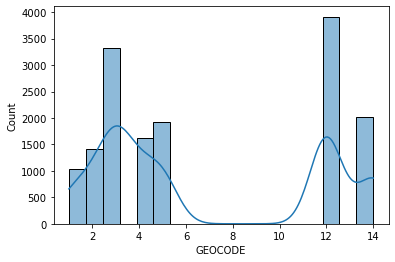

In [65]:
sns.histplot(numerical[numerical1['GEOCODE'].notna()]['GEOCODE'],kde=True) 
plt.show()

In [66]:
#sns.histplot(numerical[numerical1['GEOCODE'].isna()==False]['GEOCODE'],kde=True) 
#plt.show()

In [71]:
median_geocode=np.median(numerical1[numerical1['GEOCODE'].notna()]['GEOCODE'])

In [68]:
#imputer=KNNImputer(n_neighbors=3)
#imputer.fit_transform(numerical1[['GEOCODE']])

In [77]:
numerical1['GEOCODE']=numerical1['GEOCODE'].fillna(median_geocode)

In [79]:
#numerical1['GEOCODE'].value_counts(dropna=False)

In [80]:
numerical1['ADI'].value_counts(dropna=False)

13.0     7296
51.0     4622
65.0     3765
57.0     2836
105.0    2617
         ... 
651.0       1
103.0       1
601.0       1
161.0       1
147.0       1
Name: ADI, Length: 205, dtype: int64

In [87]:
numerical1['ADI'].isna().sum()

132

In [94]:
ml = list(numerical1[numerical1['ADI'].isna()].index)
len(ml)

132

In [95]:
numerical1['ADI'].dtype

dtype('float64')

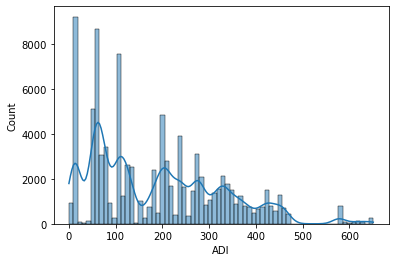

In [96]:
sns.histplot(numerical1[numerical1['ADI'].notna()]['ADI'],kde=True) 
plt.show()

In [115]:
np.mean(numerical1[numerical1['ADI'].notna()]['ADI']) # decided to use the iterative imputer

187.35640218303945

In [100]:
imputer_it=IterativeImputer()
numerical1['ADI']=imputer_it.fit_transform(numerical1[['ADI']])

In [101]:
numerical1['ADI'].isna().sum()

0

In [102]:
numerical1['DMA'].isna().sum()

132

In [103]:
numerical1['ADI'].value_counts(dropna=False)

13.0     7296
51.0     4622
65.0     3765
57.0     2836
105.0    2617
         ... 
651.0       1
103.0       1
601.0       1
161.0       1
147.0       1
Name: ADI, Length: 205, dtype: int64

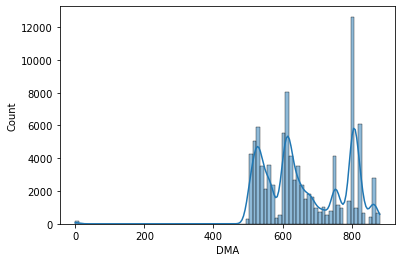

In [104]:
sns.histplot(numerical1[numerical1['DMA'].notna()]['DMA'],kde=True) 
plt.show()

In [106]:
numerical1['DMA']=imputer_it.fit_transform(numerical1[['DMA']])

In [107]:
numerical1['MSA'].value_counts(dropna=False)

0.0       21333
4480.0     4606
1600.0     4059
2160.0     2586
520.0      1685
          ...  
9140.0        1
3200.0        1
9280.0        1
743.0         1
8480.0        1
Name: MSA, Length: 299, dtype: int64

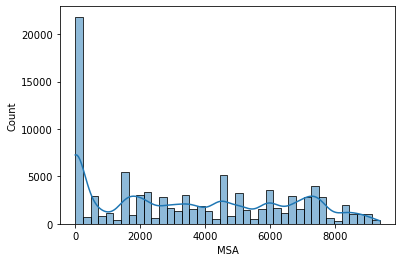

In [108]:
sns.histplot(numerical1[numerical1['MSA'].notna()]['MSA'],kde=True) 
plt.show()

In [109]:
imputerKNN=KNNImputer(n_neighbors=3)
numerical1['MSA']=imputerKNN.fit_transform(numerical1[['MSA']])

In [110]:
numerical1['WEALTH1'].value_counts(dropna=False)

NaN    44732
9.0     7585
8.0     6793
7.0     6198
6.0     5825
5.0     5280
4.0     4810
3.0     4237
2.0     4085
1.0     3454
0.0     2413
Name: WEALTH1, dtype: int64

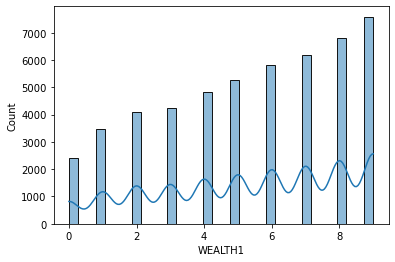

In [111]:
sns.histplot(numerical1[numerical1['WEALTH1'].notna()]['WEALTH1'],kde=True) 
plt.show()

In [116]:
wealth1_mode= numerical1['WEALTH1'].mode()[0]
wealth1_mode

9.0

In [117]:
numerical1['WEALTH1'] = numerical1['WEALTH1'].fillna(wealth1_mode) # Replacing the null values with the most represented categoty
# this is a wealth category binned into discrete numbers. the median and the mean will be even more distorted. used the mode. 

In [118]:
numerical1['WEALTH1'].isna().sum()

0

THE END